Enter Lower bound of Cropped Area :- 2 2
Enter Upper bound of Cropped Area :- 7 7
Enter Number of vertices in a Polygon :- 4
Start entering Points :- 
Enter Cordinates of  1  Vertex :- 
0 5
Enter Cordinates of  2  Vertex :- 
1 1
Enter Cordinates of  3  Vertex :- 
3 0
Enter Cordinates of  4  Vertex :- 
4 6


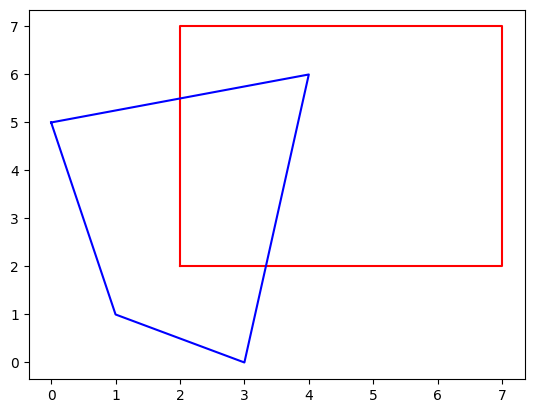

[False, False, False, True, False]
[(0, 5), (1, 1), (3, 0), (4, 6), (0, 5)]
outside to outside
outside to outside
Outside to inside
x1:  4 , y1:  6
x2:  3 , y2:  0
Inside to outside
x1:  4 , y1:  6
x2:  0 , y2:  5
[(3.3333333333333335, 2), (4, 6), (2, 5.5)]


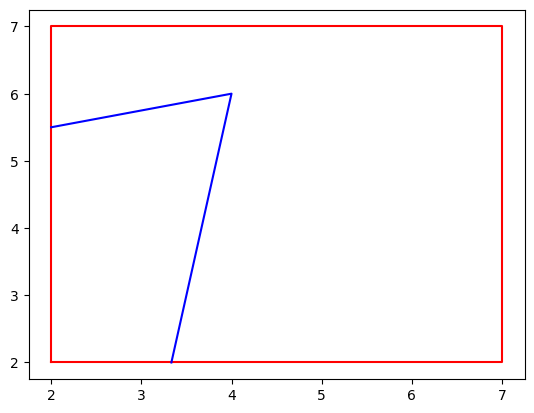

In [1]:
def draw_graph(xlist,ylist,V,title):
    plt.plot(xlist,ylist,c="red" , label="Required Area")
    x=[]
    y=[]
    for i in V:
        x.append(i[0])
        y.append(i[1])
    plt.plot(x,y,c="blue",label="Polygon")
    plt.show()


def check_points(xmin,ymin,xmax,ymax,x1,y1):
    if(x1>=xmin and x1<=xmax):
        if(y1>=ymin and y1<=ymax):
            return True
        else:
            return False
    else:
        return False
    

    
def get_xy(xmin,ymin,xmax,ymax,x1,y1,x2,y2):
    m = (y2-y1)/(x2-x1)
    if(check_points(xmin,ymin,xmax,ymax,x1,y1)):
        A=x1
        B=y1
        C=x2
        D=y2
    else:
        A=x2
        B=y2
        C=x1
        D=y1 
    print("x1: ",A,", y1: ",B)    
    print("x2: ",C,", y2: ",D)
    if(C<=xmin):
        #left
        x=xmin
        y=B+(m*(xmin-A))
    elif(C>=xmax):
        #right
        x=xmax
        y=B+(m*(xmax-A))
    elif(D<=ymin):
        #bottom
        y=ymin
        x=((ymin-B)/m)+A
    else:
        #top
        y=ymax
        x=((ymax-B)/m)+A
    return (x,y);

def clip_using_sutherland_hongeman(x1,y1,x2,y2,V):
    check=[]
    v1=[]
    for i in V:
        check.append(check_points(x1,y1,x2,y2,i[0],i[1]))
    print(check)
    print(V)
    for i in range(len(check)-1):
        if(check[i]==False):
            if(check[i+1]==True):
                print("Outside to inside")
                x,y=get_xy(x1,y1,x2,y2,V[i][0],V[i][1],V[i+1][0],V[i+1][1])
                v1.append((x,y)) 
            else:
                print("outside to outside")
        elif(check[i]):
            if(check[i+1]==True):
                print("Inside to Inside")
                v1.append((V[i][0],V[i][1]))
            else: 
                print("Inside to outside")
                v1.append((int(V[i][0]),int(V[i][1])))
                x,y=get_xy(x1,y1,x2,y2,V[i][0],V[i][1],V[i+1][0],V[i+1][1])
                v1.append((x,y))     
    print(v1) 
    xlist=[x1,x1,x2,x2,x1]
    ylist=[y1,y2,y2,y1,y1]
    draw_graph(xlist,ylist,v1,"Cropped Data is :- ")
        
        
        
    
                                   
                                   
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
x1,y1=input("Enter Lower bound of Cropped Area :- ").split()
x2,y2=input("Enter Upper bound of Cropped Area :- ").split()
xlist=[int(x1),int(x1),int(x2),int(x2),int(x1)]
ylist=[int(y1),int(y2),int(y2),int(y1),int(y1)]
count=int(input("Enter Number of vertices in a Polygon :- "))
V=[]
print("Start entering Points :- ")
for i in range(count):
    print("Enter Cordinates of ",i+1," Vertex :- ")
    x,y=input().split()
    V.append((int(x),int(y)))

V.append((V[0][0],V[0][1]))
draw_graph(xlist,ylist,V,"Actual Data is :- ")
V1=clip_using_sutherland_hongeman(int(x1),int(y1),int(x2),int(y2),V)
                               


